In [ ]:
#Importing pandas library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

data_frame = pd.read_csv('employees (1).csv')

In [ ]:
display(data_frame.head())

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08/06/1993,12:42 pm,97308.0,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 am,61933.0,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 am,130590.0,NaN,False,Finance
3,Jerry,Male,03/04/2005,1:00 pm,138705.0,NaN,True,Finance
4,Larry,Male,1/24/1998,4:47 pm,101004.0,NaN,True,Client Services


In [ ]:
data_frame_numeric = data_frame.filter(["Salary", "Bonus %"], axis = 1)
data_frame_numeric.head()


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,4.170
2,130590.0,NaN
3,138705.0,NaN
4,101004.0,NaN


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             987 non-null    float64
 5   Bonus %            984 non-null    float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [ ]:
# We would be interested in salary and bonus if we're going to only investigate numerical values and the those values
# have missing values less than 5% of a 1000. So we can eliminate the null values or we can fill them with median
# values.
data_frame_numeric.describe()

,Salary,Bonus %
count,987.000000,984.000000
mean,90725.728470,10.218255
std,32892.140335,5.539822
min,35013.000000,1.015000
25%,62816.000000,5.365750
50%,90429.000000,9.850000
75%,118744.500000,14.841250
max,149908.000000,19.944000


In [ ]:
data_frame.isnull()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
data_frame.isnull().sum()

,0
First Name,67
Gender,145
Start Date,0
Last Login Time,0
Salary,13
Bonus %,16
Senior Management,67
Team,43


In [ ]:
#To find the percentage of missing data per variable
data_frame.isna().sum()/len(data_frame)*100


,0
First Name,6.7
Gender,14.5
Start Date,0.0
Last Login Time,0.0
Salary,1.3
Bonus %,1.6
Senior Management,6.7
Team,4.3


In [ ]:
df_missing_numeric_drop = data_frame_numeric.dropna()
df_missing_numeric_drop


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,4.170
5,115163.0,10.125
6,65476.0,10.012
7,45906.0,11.598
...,...,...
995,132483.0,16.655
996,42392.0,19.675
997,96914.0,1.421
998,60500.0,11.985


In [ ]:
df_filled_missing = data_frame_numeric.fillna(data_frame_numeric.median())
df_filled_missing

,Salary,Bonus %
0,97308.0,6.945
1,61933.0,4.170
2,130590.0,9.850
3,138705.0,9.850
4,101004.0,9.850
...,...,...
995,132483.0,16.655
996,42392.0,19.675
997,96914.0,1.421
998,60500.0,11.985


In [ ]:
data_frame_numeric.head()

,Salary,Bonus %
0,97308.0,6.945
1,61933.0,4.170
2,130590.0,NaN
3,138705.0,NaN
4,101004.0,NaN


<Axes: xlabel='Salary', ylabel='Bonus %'>

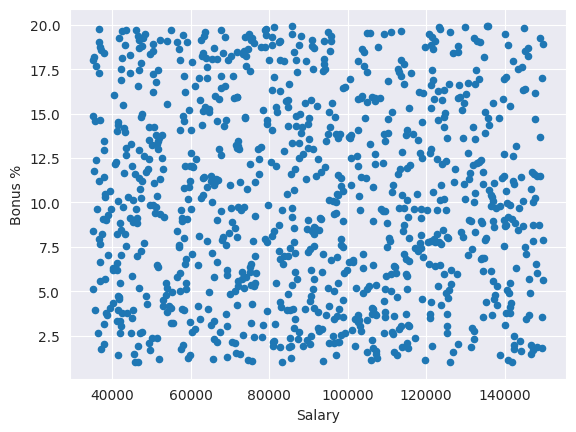

In [ ]:
data_frame_numeric.plot(x="Salary", y="Bonus %", kind="scatter")

<Axes: ylabel='Frequency'>

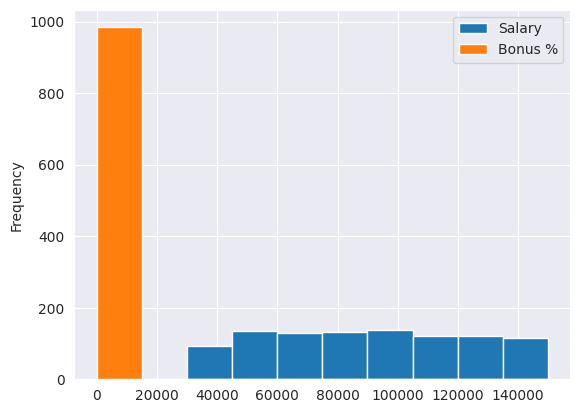

In [ ]:
data_frame.plot.hist()

array([[<Axes: title={'center': 'Bonus %'}>]], dtype=object)

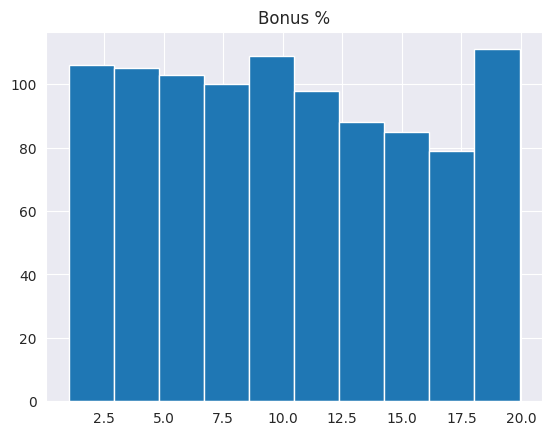

In [ ]:
#Plotting histogarm for one column
data_frame.hist(column='Bonus %')

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_filled_missing_scaled = ss.fit_transform(df_filled_missing)


In [ ]:
df_filled_missing_scaled

array([[ 0.20165055, -0.59485273],
       [-0.88144214, -1.10006637],
       [ 1.2206609 , -0.06597143],
       ...,
       [ 0.18958727, -1.60054647],
       [-0.92531697,  0.32272446],
       [ 1.20103511, -0.00789462]])

In [ ]:
df_filled_missing_scaled_df = pd.DataFrame(df_filled_missing_scaled,columns = df_filled_missing.columns)
df_filled_missing_scaled_df.head()

,Salary,Bonus %
0,0.201651,-0.594853
1,-0.881442,-1.100066
2,1.220661,-0.065971
3,1.469122,-0.065971
4,0.314813,-0.065971


In [ ]:
df_filled_missing_scaled_df.describe()

,Salary,Bonus %
count,1.000000e+03,1.000000e+03
mean,2.664535e-17,-2.842171e-16
std,1.000500e+00,1.000500e+00
min,-1.705664e+00,-1.674462e+00
25%,-8.460560e-01,-8.669399e-01
50%,-8.966967e-03,-6.597143e-02
75%,8.469595e-01,8.337640e-01
max,1.812129e+00,1.771732e+00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_filled_mms = mms.fit_transform(df_filled_missing)


In [ ]:
df_filled_mms

array([[0.5421907 , 0.31327593],
       [0.23430088, 0.16667547],
       [0.83186388, 0.46674415],
       ...,
       [0.53876148, 0.02144857],
       [0.22182863, 0.57953405],
       [0.82628487, 0.4835966 ]])

In [ ]:
df_filled_mms_df = pd.DataFrame(df_filled_mms,columns = df_filled_missing.columns)
df_filled_mms_df.head()


,Salary,Bonus %
0,0.542191,0.313276
1,0.234301,0.166675
2,0.831864,0.466744
3,0.902494,0.466744
4,0.574359,0.466744


In [ ]:
df_filled_mms_df.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,0.484868,0.485887
std,0.284411,0.290320
min,0.000000,0.000000
25%,0.244360,0.234323
50%,0.482319,0.466744
75%,0.725632,0.727825
max,1.000000,1.000000


In [ ]:
df_filled_missing.to_csv(r'/content/Index_Prepared_Data_Sal_Bon.csv')
df_filled_mms_df.to_csv(r'/content/Index_Prepared_Min_Max_Scaled.csv')
df_filled_missing_scaled_df.to_csv(r'/content/Index_Prepared_Standard_Scaled.csv')